# Getting started with ODE Test Problems

## About this notebook

This Jupyter notebook is configured to run [Octave](https://octave.org/) commands. Press `Shift + Enter` To run each cell and go the next. 
The latest version of `ODE Test Problems (OTP)` is automatically pulled from its [Github repository](https://github.com/ComputationalScienceLaboratory/ODE-Test-Problems.git). We just need to add the package to the path:

In [2]:
addpath(genpath('../../ODE-Test-Problems'))

In [1]:
graphics_toolkit("plotly")
displayformat matrix latex

## Lorenz63 test problem 

The Lorenz63 test problem, introduced by mathematician Edward Lorenz in 1963 to study the behavior of a simple system of differential equations, is a classic problem in chaos theory. It consists of three ordinary differential equations that describe the behavior of a simplified atmospheric convection system. The following are the equations:

\begin{align}
\frac{dx}{dt} &= σ(y - x), \\
\frac{dy}{dt} &= x(ρ - z) - y, \\
\frac{dz}{dt} &= xy - βz.
\end{align}
where $x$, $y$, and $z$ are variables that represent the state of the system at a given time, and σ, ρ, and β are parameters that control the behavior of the system.


Let's create the Lorenz63 problem and solve it using the default parameters and intial conditions:

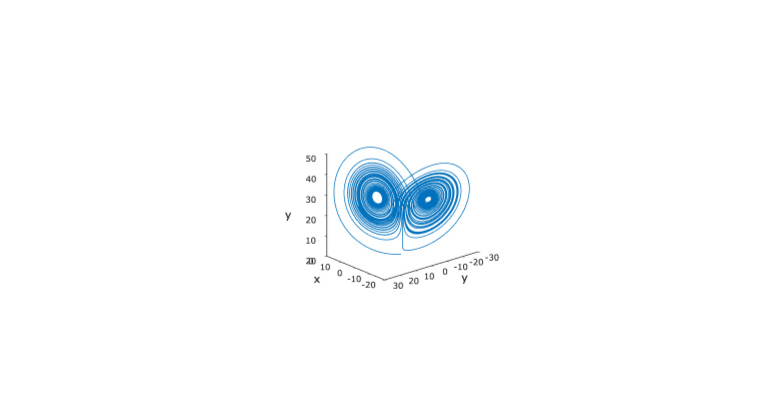

In [3]:
% Create a problem object
problem = otp.lorenz63.presets.Canonical;

% Solve the problem
sol = problem.solve('RelTol', 1e-10);

% Plot the solution
problem.plotPhaseSpace(sol);

The `problem` object contains a number of useful properties including:

* `Name`: The name of the problem
* `NumVars`: Number of variables in the state vector
* `Parameters`: Vector of problem-specific parameters that can be modified 
* `RHS` : The Right-hand-side structure inlcludes the ODE right-hand-side function and possibly Jacobians, splittings, etc. (depending on the test problem)
* `TimeSpan`: Timespan of the integration
* `Y0`: Initial condition 


## Changing the parameters of a problem

The parameters of a model are stored as properties in the problem object:

In [19]:
problem = otp.kpr.presets.Canonical;
problem.Parameters

ans =   otp.kpr.KPRParameters object with properties:

      Lambda: [2x2 double]
       Omega: [1x1 double]


You can directly change parameters and solve the mdodel again:

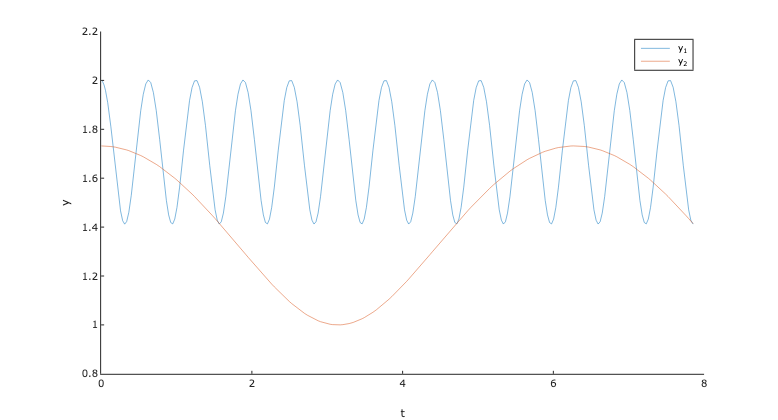

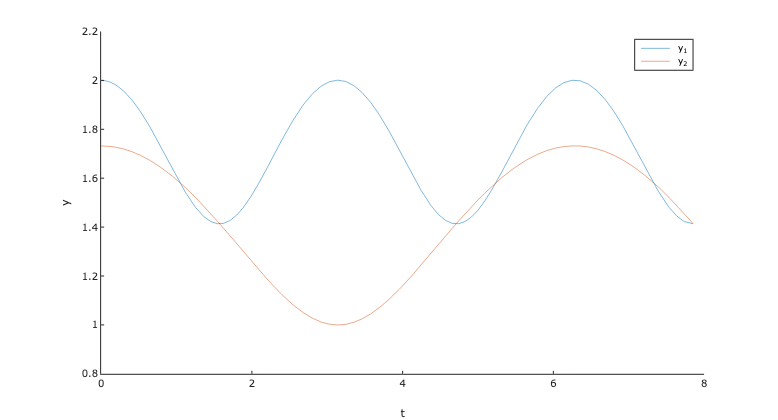

In [20]:
problem.Parameters.Omega = 10;
sol1 =  problem.solve();

problem.Parameters.Omega = 2;
sol2 = problem.solve();

problem.plot(sol1), title('KPR - \Omega = 10')
problem.plot(sol2), title('KPR - \Omega = 2')

## Plotting solutions 

`OTP` has built-in plotting capabilities for visualizing the computed problem solution.  For small problems it is possible to plot the solution trajectory using the `plot` function. 

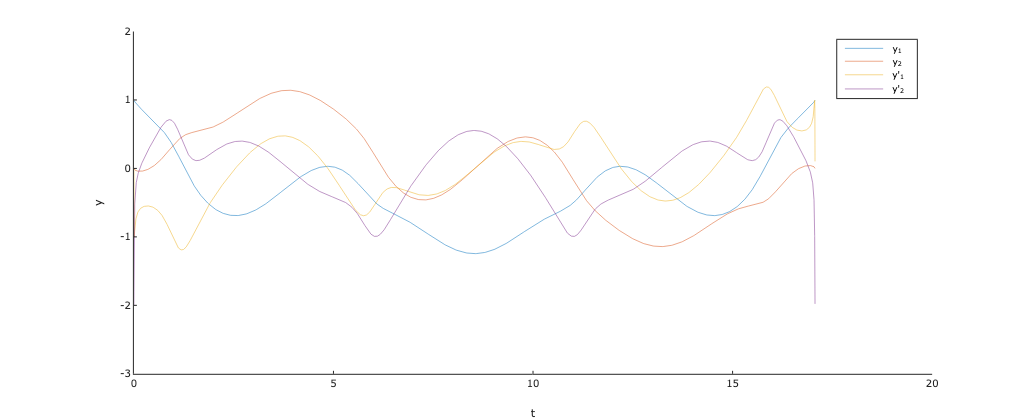

In [16]:
# Create the Arenstorf orbit problem
problem = otp.arenstorf.presets.Canonical;

# Compute the solution
sol = problem.solve('RelTol', 1e-10);

# Create solution plot
problem.plot(sol)

The `plotPhaseSpace ` function creates a phase-space diagram by visualizing all spatial-components of the state vector:

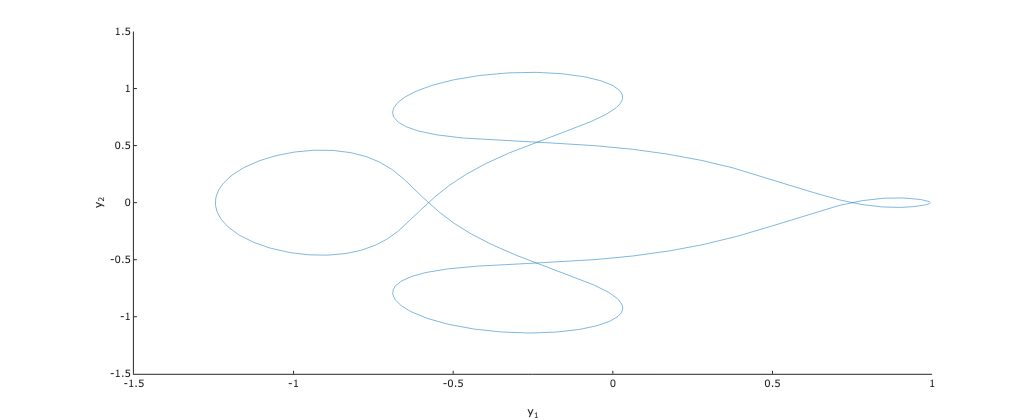

In [6]:
problem.plotPhaseSpace(sol)

## Exploring presets 

Each test problem comes with a number of `presets` that feature different characterstics in the solution of the initial value problem. As an example, The `Brusselator` test problem has *decaying, spiral, and  periodic* `presets`:

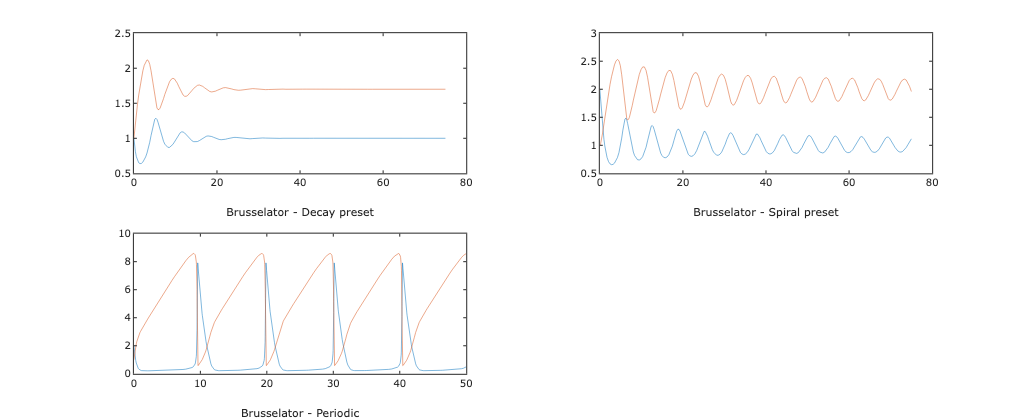

fatal: caught signal Aborted -- stopping myself...

In [21]:
subplot(2,2,1);
problem = otp.brusselator.presets.Decay();
sol = problem.solve('RelTol', 1e-6);
plot(sol.x, sol.y)
xlabel('Brusselator - Decay preset')

subplot(2,2,2);
problem = otp.brusselator.presets.Spiral();
sol = problem.solve('RelTol', 1e-6);
plot(sol.x, sol.y)
xlabel('Brusselator - Spiral preset')

subplot(2,2,3);
problem = otp.brusselator.presets.Periodic();
sol = problem.solve('RelTol', 1e-6);
plot(sol.x, sol.y)
xlabel('Brusselator - Periodic')

## Changing the solver

The choice of ODE solver for the test problems is flexible. Here, we will use the *Explicit* time-stepping method `ode45` to solve the `Robertson` problem:

In [35]:
% Create a problem object
problem          = otp.robertson.presets.Canonical();
problem.TimeSpan = [0,5];

We will pass the right-hand-side function, timespan of the integration, and the initial condition to `ode45`:

In [36]:
tic
sol = ode45(problem.RHS.F, problem.TimeSpan, problem.Y0);
toc

Elapsed time is 3.08477 seconds.


Since this is a stiff problem, the explicit solver takes a long time to finish the integration. For a faster result, we can use the *Implicit* ODE solver `ode23s` and provide it with the Jacobian of the right-hand-side: 

In [37]:
tic
sol = ode23s(problem.RHS.F, problem.TimeSpan, problem.Y0, odeset('Jacobian', problem.RHS.Jacobian));
toc

Elapsed time is 0.0469949 seconds.


# List of ODE Test Problems

You can use any of the problems using the template command

`model = otp.{problem name}.presets.{Preset name};`

Here is a table of test problems currently implemented in `OTP`. A default `{Preset name}` for all implemented problems is `Canonical`. Other presets are specific to each test problem.

| Test Problem       | Description                                                                                         |
|--------------------|-----------------------------------------------------------------------------------------------------|
| allencahn          | The Allen-Cahn equation models phase separation and pattern formation.                               |
| ascherlineardae    | A linear advection-diffusion equation used to study numerical stability.                            |
| arenstorf          | The Arenstorf orbit problem models a spacecraft's trajectory around the moon.                        |
| bouncingball       | A simple bouncing ball model used to study event detection and simulation.                           |
| brusselator        | The Brusselator is a simple model for chemical reactions that exhibits oscillatory behavior.         |
| cusp               | The cusp equation models a system with a fold bifurcation.                                           |
| e5                 | A set of differential equations describing a predator-prey model with spatial interactions.         |
| hires              | A set of differential equations used to study high-dimensional chaos and long-term integration.     |
| inverterchain      | A chain of inverters used to study coupled oscillators.                                              |
| kpr                | The KPR model is used to study pattern formation in chemical reactions.?                              |
| lienard            | The Lienard equation models a system with a Hopf bifurcation.                                        |
| lorenz63           | The Lorenz 63 system is a simple model for atmospheric convection that exhibits chaotic behavior.    |
| lorenz96           | A set of differential equations used to study atmospheric dynamics and chaos.                       |
| lotkavolterra      | A set of differential equations modeling population dynamics in predator-prey systems.             |
| nbody              | A set of differential equations describing the motion of N interacting point masses.               |
| oregonator         | The Oregonator model is a set of differential equations used to study oscillatory behavior.         |
| pendulum           | The simple pendulum equation models the motion of a swinging pendulum.                               |
| protherorobinson   | The Prothero-Robinson system is used to study the stability of numerical schemes.                   |
| quadratic          | A simple quadratic model used to study numerical methods for ODEs.                                   |
| robertson          | The Robertson reaction model is a set of differential equations used to study chemical kinetics.     |
| sanzserna          | A set of differential equations used to study numerical methods for DAEs.                           |
| torus              | The torus equation models the motion of a point on a torus.                                           |
| transistoramplifier | A set of differential equations modeling the behavior of a common emitter transistor amplifier circuit. |
| trigonometricdae   | A set of differential-algebraic equations used to study numerical methods for DAEs.                 |
| vanderpol          | The van der Pol oscillator models the behavior of an electronic oscillator.                          |


## Inverse Problem

In [16]:
model = otp.lorenz63.presets.Canonical
sol   = model.solve()

model =   otp.lorenz63.presets.Canonical object with properties:

            Name: Lorenz Equations
         NumVars: [1x1 double]
      Parameters: [1x1 otp.lorenz63.Lorenz63Parameters]
             RHS: [1x1 otp.RHS]
        TimeSpan: [2x1 double]
              Y0: [3x1 double]


sol =     x =

     Columns 1 through 7:

             0    0.0355    0.0680    0.1116    0.1681    0.2395    0.3199

     Columns 8 through 14:

        0.3800    0.4267    0.4718    0.5123    0.5539    0.6102    0.6717

     Columns 15 through 21:

        0.7373    0.8099    0.8947    0.9951    1.1045    1.2369    1.3537

     Columns 22 through 28:

        1.4942    1.6328    1.7555    1.8897    2.0054    2.1427    2.2726

     Columns 29 through 35:

        2.3902    2.5124    2.6280    2.7637    2.8920    3.0076    3.1275

     Columns 36 through 42:

        3.2413    3.3759    3.5045    3.6188    3.7389    3.8499    3.9841

     Columns 43 through 49:

        4.1146    4.2284    4.3507    4.4591    4.5934    4.7260    4.8403

     Columns 50 through 56:

        4.9636    5.0698    5.2046    5.3372    5.4516    5.5730    5.6770

     Columns 57 through 63:

        5.8151    5.9431    6.0545    6.1737    6.2762    6.4085    6.5329

     Columns 64 through 70:

        6.6452

In [21]:
model.Parameters.Sigma

ans = 10


In [22]:
sig = 1.11

sig = 1.1100


In [27]:
printf('model.Parameters.Sigma = %f', sig)

model.Parameters.Sigma = 1.110000

In [34]:
eval(sprintf('model = otp.lorenz63.presets.Canonical; model.Parameters.Sigma = %f ; sol = model.solve()', sig))

sol =     x =

     Columns 1 through 7:

             0    0.0681    0.1540    0.2776    0.4328    0.6030    0.7777

     Columns 8 through 14:

        0.9496    1.0804    1.2054    1.2917    1.3669    1.4608    1.5544

     Columns 15 through 21:

        1.6697    1.8082    1.9469    2.0545    2.1571    2.2701    2.3954

     Columns 22 through 28:

        2.5247    2.6658    2.8216    2.9547    3.1054    3.2587    3.4113

     Columns 29 through 35:

        3.5945    3.7555    3.9534    4.1338    4.3398    4.5351    4.7641

     Columns 36 through 42:

        4.9757    5.2384    5.4700    5.7195    6.0292    6.3016    6.5786

     Columns 43 through 49:

        6.8938    7.2662    7.6164    7.9604    8.2986    8.6248    8.9444

     Columns 50 through 56:

        9.2546    9.5616    9.8713   10.1930   10.5380   10.9149   11.3094

     Columns 57 through 63:

       11.6738   11.9852   12.2735   12.5843   12.9425   13.2873   13.6243

     Columns 64 through 70:

       13.9547

In [33]:
eval(sprintf('model = otp.lorenz63.presets.Canonical; model.Parameters.Sigma = %f ; sol = model.solve()', sig))

Execution exception: can not add variable "model" to a static workspace

In [19]:
model.RHS.JacobianAdjointVectorProduct

ans = @(t, y, v) otp.lorenz63.jacobianAdjointVectorProduct (t, y, v, sigma, rho, beta)
